<a href="https://colab.research.google.com/github/ykitaguchi77/CorneAI/blob/main/50_knock_csv_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**「前原の100本ノック」クラス枚数確認**

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [2]:
import pandas as pd

# 100問_正解リスト.csvファイルからデータフレームを作成する
ans_df = pd.read_csv('/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/100問_正解リスト.csv')

# 100問ノック_スマホと細隙灯区分.csvファイルからデータフレームを作成する
knock_df = pd.read_csv('/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/100問ノック_スマホと細隙灯区分.csv')

In [ ]:
ans_df

In [ ]:
knock_df

In [ ]:
import pandas as pd

# "device"の行をdf_answerに追加
ans_df['device'] = ""

# "slit"と"smartphone"の列を取得
slit = knock_df["slit"].tolist()
smartphone = knock_df["smartphone"].tolist()

# "device"列に"slit"と"smartphone"を入力
for i in range(1,101):
    if i in slit:
        ans_df.loc[ans_df["number"]==i, "device"] = "slit"
    elif i in smartphone:
        ans_df.loc[ans_df["number"]==i, "device"] = "smartphone"

# インデックスをリセット
ans_df = ans_df.reset_index(drop=True)
ans_df

In [ ]:
smartphone_df = ans_df[ans_df['device'] == 'smartphone']
smartphone_classification_counts = smartphone_df['classification'].value_counts()
print("前原100本ノック_スマホ画像の各クラス枚数一覧")
print(smartphone_classification_counts)

前原100本ノック_スマホ画像の各クラス枚数一覧
正常        7
沈着        7
水晶体混濁     6
感染        6
腫瘍        6
水疱性角膜症    5
非感染       5
緑内障発作     4
瘢痕        4
Name: classification, dtype: int64


In [ ]:
slit_df = ans_df[ans_df['device'] == 'slit']
slit_classification_counts = slit_df['classification'].value_counts()
print("前原100本ノック_スリット画像の各クラス枚数一覧")
print(slit_classification_counts)

前原100本ノック_スリット画像の各クラス枚数一覧
正常        7
沈着        7
腫瘍        6
感染        6
水晶体混濁     6
水疱性角膜症    5
非感染       5
瘢痕        4
緑内障発作     4
Name: classification, dtype: int64


In [ ]:
ans_df


In [ ]:
ans_df[ans_df["number"]==1]

,disease,classification,number,device
0,翼状片,腫瘍,1,slit


In [ ]:
ans_df

In [ ]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)

In [ ]:
ans_df = ans_df.replace("腫瘍", "tumor")
ans_df = ans_df.replace("瘢痕", "scar")
ans_df = ans_df.replace("水晶体混濁", "lens-opacity")
ans_df = ans_df.replace("緑内障発作", "APAC")
ans_df = ans_df.replace("感染", "infection")
ans_df = ans_df.replace("非感染", "non-infection")
ans_df = ans_df.replace("水疱性角膜症", "bullous")
ans_df = ans_df.replace("沈着", "deposit")
ans_df = ans_df.replace("正常", "normal")
ans_df


In [97]:
ans_df.to_csv("/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/100問_正解リスト_2.csv")

In [96]:
ans_df.columns

Index(['Unnamed: 0', 'disease', 'classification', 'number', 'device'], dtype='object')

#**Computer vs Smartphone**

In [3]:
data_dir = "/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/PC_vs_smartphone.csv"


data_df = pd.read_csv(data_dir, encoding='cp932')
data_df
data_df.columns = ['ファイル名', 'CorneAI_PC', 'normal', 'infection', 'non-infection', 'scar', 'deposit', 'bullous',
       'tumor', 'lens-opacity', 'APAC', 'Unnamed: 11', 'CorneAI_ios',
       'normal', 'infection', 'non-infection', 'scar', 'deposit', 'bullous',
       'tumor', 'lens-opacity', 'APAC']


In [4]:
# add answer and device information to data_dir
ans_df = pd.read_csv("/content/drive/MyDrive/研究/進行中の研究/角膜スマートフォンAIプロジェクト/前原の100問/100問_正解リスト_2.csv")
data_df["device"] = ans_df["device"]
data_df["answer"] = ans_df["classification"]

In [5]:
data_df

,ファイル名,CorneAI_PC,normal,infection,non-infection,scar,deposit,bullous,tumor,lens-opacity,...,infection,non-infection,scar,deposit,bullous,tumor,lens-opacity,APAC,device,answer
0,001.jpg,NaN,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.647684,0.000000,...,0.0,NaN,NaN,NaN,0.00,91.0,NaN,NaN,slit,tumor
1,002.jpg,NaN,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.647684,0.000000,...,NaN,0.20,88.00,13.0,NaN,NaN,NaN,NaN,slit,scar
2,003.png,NaN,0.000000,0.000000,0.00000,0.233047,0.0,0.249145,0.000000,0.220650,...,NaN,NaN,93.00,0.2,1.00,NaN,NaN,NaN,smartphone,lens-opacity
3,004.png,NaN,0.000000,0.000000,0.00000,0.233047,0.0,0.249145,0.000000,0.220650,...,NaN,NaN,NaN,NaN,0.50,NaN,NaN,95.00,smartphone,APAC
4,005.jpg,NaN,0.000000,0.947407,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,...,90.0,NaN,NaN,0.0,0.00,NaN,NaN,NaN,slit,infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,096.png,NaN,0.000360,0.000000,0.00000,0.000000,0.0,0.000000,0.000250,0.950568,...,NaN,NaN,0.03,NaN,NaN,NaN,92.0,NaN,smartphone,lens-opacity
96,097.png,NaN,0.000115,0.000000,0.00000,0.000000,0.0,0.917792,0.000000,0.000000,...,NaN,NaN,NaN,NaN,94.50,NaN,NaN,0.01,smartphone,bullous
97,098.png,NaN,0.000000,0.000000,0.00000,0.000000,0.0,0.000000,0.000841,0.000000,...,NaN,NaN,NaN,NaN,0.30,NaN,0.2,95.20,slit,APAC
98,099.png,NaN,0.000000,0.917694,0.00000,0.000000,0.0,0.000000,0.000138,0.000000,...,95.0,0.06,NaN,NaN,0.03,NaN,NaN,NaN,smartphone,infection


In [23]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 150)


In [24]:
import random
import numpy as np

# top1の確率、各top3のindexを出力する

def top3(data_df, row):
    # computerとsmartphoneの判定の列を別々に取り出す
    computer_cols = data_df.iloc[row, 2:10].astype(float).fillna(0)
    smartphone_cols = data_df.iloc[row, 13:22].astype(float).fillna(0)

    # numpy.argsortを使って、各列の値が降順になるようにインデックスを並び替える
    computer_idx = np.argsort(-computer_cols)
    smartphone_idx = np.argsort(-smartphone_cols)

    # インデックスから列名を取得する
    computer_names = computer_cols.index[computer_idx]
    smartphone_names = smartphone_cols.index[smartphone_idx]

    # computerとsmartphoneのtop1の確率を取得する
    computer_top_prob = computer_cols[computer_names[0]]
    smartphone_top_prob = smartphone_cols[smartphone_names[0]]

    #answerとdeviceと追加
    device = data_df.loc[row, "device"]
    answer = data_df.loc[row, "answer"]

    # top3の列名とtop1の確率をリストとして返す
    return [computer_names[0], computer_top_prob, computer_names[1], computer_names[2], smartphone_names[0],  smartphone_top_prob/100, smartphone_names[1], smartphone_names[2], answer, device]
 
top3(data_df, 3)

['bullous',
 0.249145,
 'scar',
 'lens-opacity',
 'APAC',
 0.95,
 'bullous',
 'normal',
 'APAC',
 'smartphone']

In [38]:
top3_df

,computer_top1,computer_top1_prob,computer_top2,computer_top3,smartphone_top1,smartphone_top1_prob,smartphone_top2,smartphone_top3,answer,device
0,tumor,0.647684,normal,infection,tumor,0.91,normal,infection,tumor,slit
1,tumor,0.647684,normal,infection,scar,0.88,deposit,non-infection,scar,slit
2,bullous,0.249145,scar,lens-opacity,scar,0.93,bullous,deposit,lens-opacity,smartphone
3,bullous,0.249145,scar,lens-opacity,APAC,0.95,bullous,normal,APAC,smartphone
4,infection,0.947407,normal,non-infection,infection,0.9,normal,non-infection,infection,slit
5,infection,0.953093,tumor,normal,infection,0.95,non-infection,normal,infection,smartphone
6,deposit,0.329815,normal,lens-opacity,normal,0.8,lens-opacity,deposit,lens-opacity,slit
7,deposit,0.329815,normal,lens-opacity,normal,0.97,infection,non-infection,normal,slit
8,normal,0.967782,tumor,non-infection,normal,0.8,lens-opacity,scar,normal,smartphone
9,normal,0.967782,tumor,non-infection,scar,0.95,lens-opacity,non-infection,scar,smartphone


In [ ]:
top3_df = pd.DataFrame(index=[], columns=["computer_top1", "computer_top1_prob", "computer_top2", "computer_top3", "smartphone_top1", "smartphone_top1_prob", "smartphone_top2", "smartphone_top3", "answer", "device"])

for row in range(len(data_df)):
    top3_df.loc[row, ["computer_top1", "computer_top1_prob", "computer_top2", "computer_top3", "smartphone_top1", "smartphone_top1_prob", "smartphone_top2", "smartphone_top3", "answer", "device"]] = top3(data_df, row)
top3_df

In [27]:
take_slit_judge_computer = top3_df.loc[(top3_df["device"] == "slit"), "computer_top1"].tolist()
take_slit_judge_smartphone = top3_df.loc[(top3_df["device"] == "slit"), "smartphone_top1"].tolist()
take_smartphone_judge_computer = top3_df.loc[(top3_df["device"] == "smartphone"), "computer_top1"].tolist()
take_smartphone_judge_smartphone = top3_df.loc[(top3_df["device"] == "smartphone"), "smartphone_top1"].tolist()
take_slit_answer = top3_df.loc[top3_df["device"] == "slit", "answer"].tolist()
take_smartphone_answer = top3_df.loc[top3_df["device"] == "smartphone", "answer"].tolist()

In [31]:
# calculate top1 accuracy
computer_correct = sum(top3_df["computer_top1"] == top3_df["answer"])
smartphone_correct = sum(top3_df["smartphone_top1"] == top3_df["answer"])
correspond = sum(top3_df["smartphone_top1"] == top3_df["computer_top1"])


print(f"computer_top1: {computer_correct}/100")
print(f"smartphone_top1: {smartphone_correct}/100") 
print(f"correspond: {correspond}/100")  

computer_top1: 71/100
smartphone_top1: 78/100
correspond: 73/100


In [32]:
# calculate top3 accuracy
computer_correct = top3_df[["computer_top1", "computer_top2", "computer_top3"]].eq(top3_df["answer"], axis=0).any(axis=1).sum()
smartphone_correct = top3_df[["smartphone_top1", "smartphone_top2", "smartphone_top3"]].eq(top3_df["answer"], axis=0).any(axis=1).sum()
smartphone_top1_in_computer_top3 = top3_df[["computer_top1", "computer_top2", "computer_top3"]].eq(top3_df["smartphone_top1"], axis=0).any(axis=1).sum()

print(f"computer_top3: {computer_correct}/100")
print(f"smartphone_top3: {smartphone_correct}/100") 
print(f"smartphone_top1 in computer_top3: {smartphone_top1_in_computer_top3}/100")  

computer_top3: 81/100
smartphone_top3: 90/100
smartphone_top1 in computer_top3: 80/100


In [79]:
def get_matching_rows(text, df, col1, col2, devices):
    matching_rows = 0
    num_device_rows = 0
    for device in devices:
        # df[device_col] = deviceである行の数：
        device_rows = df[df["device"] == device]
        num_device_rows += len(device_rows)

        # df[device_col] = deviceである行のうち、df[col2]とdf[col1]が一致する行の数：
        matching_rows += df[df["device"] == device][col2].eq(df[col1], axis=0).any(axis=1).sum()

    percent = matching_rows * 100 / num_device_rows

    print(text)
    print(f"accuracy: {percent}% ({matching_rows}/{num_device_rows})")
    print("")

get_matching_rows("smartphone vs computer", top3_df, "smartphone_top1", ["computer_top1"], ["slit", "smartphone"])
get_matching_rows("computer accuracy", top3_df, "answer", ["computer_top1"], ["slit", "smartphone"])
get_matching_rows("smartphone accuracy", top3_df, "answer", ["smartphone_top1"], ["slit", "smartphone"])
print("")
get_matching_rows("smartphone vs computer_top3", top3_df, "smartphone_top1", ["computer_top1", "computer_top2", "computer_top3"], ["slit", "smartphone"])
get_matching_rows("computer_top3 accuracy", top3_df, "answer", ["computer_top1", "computer_top2", "computer_top3"], ["slit", "smartphone"])
get_matching_rows("smartphone_top3 accuracy", top3_df, "answer", ["smartphone_top1", "smartphone_top2", "smartphone_top3"], ["slit", "smartphone"])
print("")
get_matching_rows("taken by smartphone、smartphone vs computer", top3_df, "smartphone_top1", ["computer_top1"], ["smartphone"])
get_matching_rows("taken by slit、smartphone vs computer", top3_df, "smartphone_top1", ["computer_top1"], ["slit"])
get_matching_rows("taken by slit、computer accuracy", top3_df, "answer", ["computer_top1"], ["slit"])
get_matching_rows("taken by slit、smartphone accuracy", top3_df, "answer", ["smartphone_top1"], ["slit"])
get_matching_rows("taken by smartphone、computer accuracy", top3_df, "answer", ["computer_top1"], ["smartphone"])
get_matching_rows("taken by smartphone、smartphone accuracy", top3_df, "answer", ["smartphone_top1"], ["smartphone"])
print("")
get_matching_rows("taken by smartphone、smartphone vs computer_top3", top3_df, "smartphone_top1", ["computer_top1", "computer_top2", "computer_top3"], ["smartphone"])
get_matching_rows("taken by slit、smartphone vs computer_top3", top3_df, "smartphone_top1", ["computer_top1", "computer_top2", "computer_top3"], ["slit"])
get_matching_rows("taken by slit、computer_top3 accuracy", top3_df, "answer", ["computer_top1", "computer_top2", "computer_top3"], ["slit"])
get_matching_rows("taken by slit、smartphone_top3 accuracy", top3_df, "answer", ["smartphone_top1", "smartphone_top2", "smartphone_top3"], ["slit"])
get_matching_rows("taken by smartphone、computer_top3 accuracy", top3_df, "answer", ["computer_top1", "computer_top2", "computer_top3"], ["smartphone"])
get_matching_rows("taken by smartphone、smartphone_top3 accuracy", top3_df, "answer", ["smartphone_top1", "smartphone_top2", "smartphone_top3"], ["smartphone"])

smartphone vs computer
accuracy: 73.0% (73/100)

computer accuracy
accuracy: 71.0% (71/100)

smartphone accuracy
accuracy: 78.0% (78/100)


smartphone vs computer_top3
accuracy: 80.0% (80/100)

computer_top3 accuracy
accuracy: 81.0% (81/100)

smartphone_top3 accuracy
accuracy: 90.0% (90/100)


taken by smartphone、smartphone vs computer
accuracy: 74.0% (37/50)

taken by slit、smartphone vs computer
accuracy: 72.0% (36/50)

taken by slit、computer accuracy
accuracy: 72.0% (36/50)

taken by slit、smartphone accuracy
accuracy: 84.0% (42/50)

taken by smartphone、computer accuracy
accuracy: 70.0% (35/50)

taken by smartphone、smartphone accuracy
accuracy: 72.0% (36/50)


taken by smartphone、smartphone vs computer_top3
accuracy: 80.0% (40/50)

taken by slit、smartphone vs computer_top3
accuracy: 80.0% (40/50)

taken by slit、computer_top3 accuracy
accuracy: 80.0% (40/50)

taken by slit、smartphone_top3 accuracy
accuracy: 94.0% (47/50)

taken by smartphone、computer_top3 accuracy
accuracy: 82.0% (41/5

In [37]:
def calculate_accuracy(a_list, b_list):
    correct = 0
    for i in range(len(a_list)):
        if a_list[i] == b_list[i]:
            correct += 1

    accuracy = correct / len(a_list) * 100
    print(f"accuracy: {accuracy}%")

print("computer vs smartphone:")
calculate_accuracy(top3_df["computer_top1"], top3_df["smartphone_top1"])

print("\ntaken by slit:")
calculate_accuracy(take_slit_judge_computer, take_slit_judge_smartphone)

print("\ntaken by smartphone:")
calculate_accuracy(take_smartphone_judge_computer, take_smartphone_judge_smartphone)


print("\ncomputer:")
calculate_accuracy(top3_df["computer_top1"], top3_df["answer"])

print("\ncomputer, taken by slit:")
calculate_accuracy(take_slit_judge_computer, take_slit_answer)

print("\ncomputer, taken by smartphone:")
calculate_accuracy(take_smartphone_judge_computer, take_smartphone_answer)


print("\nsmartphone:")
calculate_accuracy(top3_df["smartphone_top1"], top3_df["answer"])

print("\nsmartphone, taken by slit:")
calculate_accuracy(take_slit_judge_smartphone, take_slit_answer)

print("\nsmartphone, taken by smartphone:")
calculate_accuracy(take_smartphone_judge_smartphone, take_smartphone_answer)

computer vs smartphone:
accuracy: 73.0%

taken by slit:
accuracy: 72.0%

taken by smartphone:
accuracy: 74.0%

computer:
accuracy: 71.0%

computer, taken by slit:
accuracy: 72.0%

computer, taken by smartphone:
accuracy: 70.0%

smartphone:
accuracy: 78.0%

smartphone, taken by slit:
accuracy: 84.0%

smartphone, taken by smartphone:
accuracy: 72.0%


<Axes: >

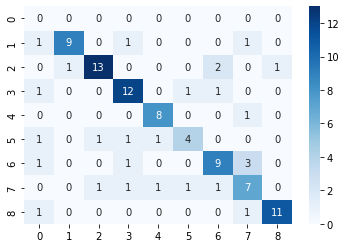

In [177]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(computer_ans_list, smartphone_ans_list)
cm
sns.heatmap(cm, annot=True, cmap='Blues')

<Axes: >

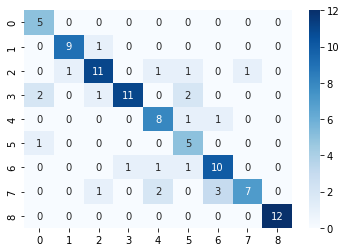

In [147]:
cm = confusion_matrix(top1_df["smartphone"], top1_df["answer"])
cm
sns.heatmap(cm, annot=True, cmap='Blues')

<Axes: >

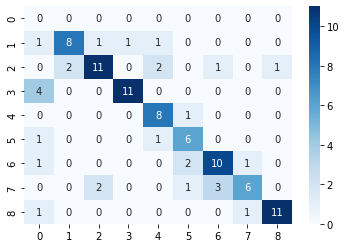

In [148]:
cm = confusion_matrix(top1_df["computer"], top1_df["answer"])
cm
sns.heatmap(cm, annot=True, cmap='Blues')